
#*IMPORT* LIBERLY

In [2]:
# load packages
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
# not needed, only to prettify the plots.
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Import_data

In [0]:
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

##data_1 Large-Cap

In [4]:
# ===========
today = "2020-01-01"  # to make static this script.
tckr = 'VV'  
# download data
data_1 = pdr.get_data_yahoo(tckr, "2000-01-01", today)
# add frequency needed for some pandas functionalities releated with offsets
data_1 = data_1.asfreq('B')  
data_1.columns = data_1.columns.map(lambda col: col.lower())

[*********************100%***********************]  1 of 1 downloaded


In [5]:
data_1.head(5)

,open,high,low,close,adj close,volume
Date,,,,,,
2004-01-30,49.459999,49.459999,49.340000,49.450001,36.033859,117500.0
2004-02-02,49.619999,49.950001,49.439999,49.500000,36.070274,6600.0
2004-02-03,49.619999,49.709999,49.610001,49.660000,36.186878,5800.0
2004-02-04,49.450001,49.500000,49.200001,49.330002,35.946415,4400.0
2004-02-05,49.360001,49.450001,49.150002,49.380001,35.982845,7500.0


In [6]:
data_1 = data_1[[ 'close']]
data_1.rename(columns={'close':'large_cap'},inplace=True)
data_1

,large_cap
Date,
2004-01-30,49.450001
2004-02-02,49.500000
2004-02-03,49.660000
2004-02-04,49.330002
2004-02-05,49.380001
...,...
2019-12-25,NaN
2019-12-26,148.309998
2019-12-27,148.259995


#Compute Max Drawdown 1

##Compute a wealth index

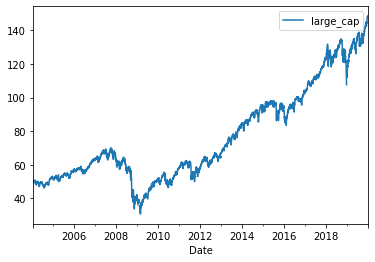

In [11]:
data_1.plot.line()

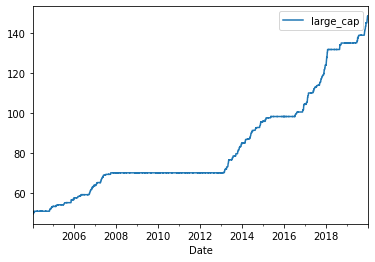

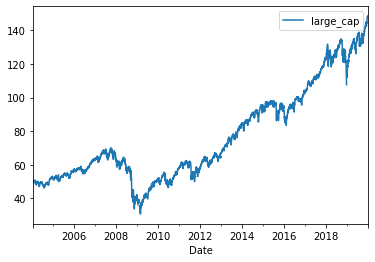

In [15]:
previous_peeks_1 = data_1.cummax()
previous_peeks_1.plot()
data_1.plot()

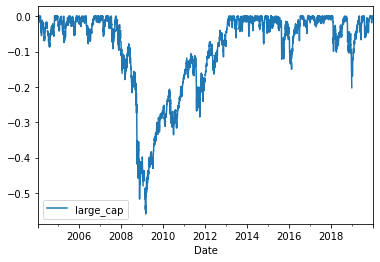

In [16]:
drowdown_1 = (data_1 - previous_peeks_1)/previous_peeks_1

drowdown_1.plot()

In [19]:
drowdown_1.min()

large_cap   -0.559571
dtype: float64

#Compute Max Drawdown 2 Creating a Drawdown Function

In [0]:
def drawdown(series: pd.Series):
    """Takes a time series of asset price.
       returns a DataFrame with columns for 
       the previous peaks, and 
       the percentage drawdown
    """
    previous_peaks = series.cummax()
    drawdowns = (series - previous_peaks)/previous_peaks
    return pd.DataFrame({"series": series, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})


In [22]:
drawdown(data_1["large_cap"]).min()

series           30.830000
Previous Peak    49.450001
Drawdown         -0.559571
dtype: float64

#

In [24]:
drawdown(data_1["large_cap"])["Drawdown"].idxmin()

Timestamp('2009-03-09 00:00:00', freq='B')

#Compute Max Drawdown 3 Creating  ffn


In [28]:
!pip install ffn
import ffn
#%pylab inline


  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22814 sha256=ebd366731d9d365f7ac1cdb9b37fe00c4e99dc86b95583ca529c636f1119d861
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built ffn


/usr/local/lib/python3.6/dist-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


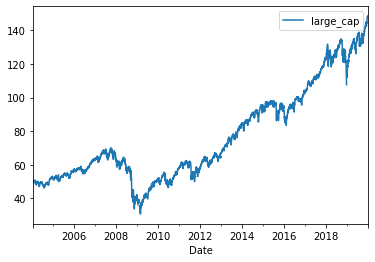

In [31]:
ax = data_1.plot()

In [0]:
# now what do the return distributions look like?
returns = data_1.to_returns().dropna()


In [34]:
# ok now what about some performance metrics?
stats = data_1.calc_stats()
stats.display()

Stat                 large_cap
-------------------  -----------
Start                2004-01-30
End                  2019-12-31
Risk-free rate       0.00%

Total Return         198.97%
Daily Sharpe         0.47
Daily Sortino        0.73
CAGR                 7.12%
Max Drawdown         -55.96%
Calmar Ratio         0.13

MTD                  2.35%
3m                   8.44%
6m                   9.74%
YTD                  28.71%
1Y                   28.71%
3Y (ann.)            12.82%
5Y (ann.)            9.39%
10Y (ann.)           11.30%
Since Incep. (ann.)  7.12%

Daily Sharpe         0.47
Daily Sortino        0.73
Daily Mean (ann.)    8.49%
Daily Vol (ann.)     17.88%
Daily Skew           -0.12
Daily Kurt           11.67
Best Day             11.46%
Worst Day            -8.94%

Monthly Sharpe       0.57
Monthly Sortino      0.92
Monthly Mean (ann.)  7.84%
Monthly Vol (ann.)   13.64%
Monthly Skew         -0.80
Monthly Kurt         2.24
Best Month           11.04%
Worst Month          -17.1

In [0]:
# what about the drawdowns?
ax = stats.prices.to_drawdown_series().plot()

In [37]:
max_drawdown = stats.prices.to_drawdown_series().min()

max_drawdown 

large_cap   -0.559571
dtype: float64